In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.3)

## Load data

In [2]:
#data_f = pd.read_csv("data/MFP_4medidas.csv")
#data_f.head()

In [6]:
#df = data_f[['efficiency','entropy','attendance','inequality']]

In [3]:
df = pd.read_table("simulation_params.dat", sep="\s+", header=None, names=['efficiency','inequality','n_efficiency','n_inequality','entropy','frequency'])
df

,efficiency,inequality,n_efficiency,n_inequality,entropy,frequency
0,121.656250,211.147819,0.062404,0.108309,0.000000,0.00
1,80.479375,80.855471,0.124356,0.124937,0.396205,0.32
2,-0.625000,0.572822,-0.104167,0.095470,0.000000,0.00
3,-0.500000,0.306186,-0.166667,0.102062,0.000000,0.00
4,121.468750,209.957555,0.062597,0.108198,0.000000,0.00
...,...,...,...,...,...,...
196,243.812500,243.812500,0.125000,0.125000,0.000000,0.00
197,162.333125,162.208157,0.125032,0.124936,0.396205,0.32
198,121.635000,70.370387,0.187275,0.108346,0.396205,0.66
199,121.718750,210.823133,0.062500,0.108253,0.000000,0.00


## Plot data

<Axes: xlabel='n_efficiency', ylabel='n_inequality'>

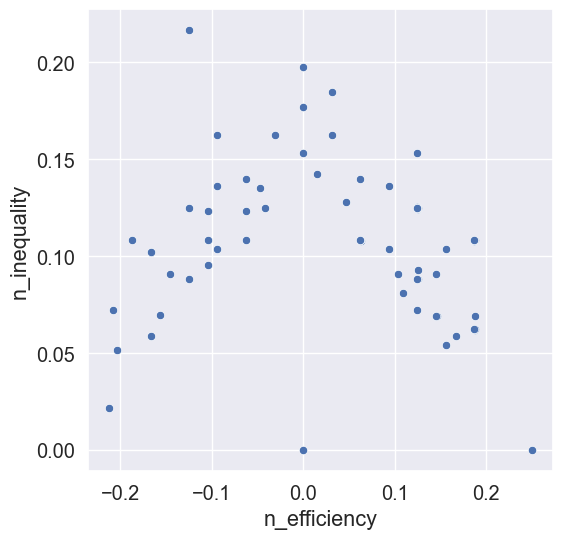

In [5]:
fig0, ax = plt.subplots(figsize=(6,6))
sns.scatterplot(data=df, ax=ax, x='n_efficiency', y='n_inequality')

## Standardize data

In [6]:
df_std = df[['n_efficiency','n_inequality','entropy']].apply(lambda x: x-np.mean(x))
df_std = df_std.apply(lambda x: x/np.std(x))
df_std.head()

,n_efficiency,n_inequality,entropy
0,-0.159422,0.053538,-1.053890
1,0.444535,0.634777,0.873327
2,-1.783285,-0.395227,-1.053890
3,-2.392585,-0.164813,-1.053890
4,-0.157542,0.049655,-1.053890


## Plot standardized data

<Axes: xlabel='n_efficiency', ylabel='n_inequality'>

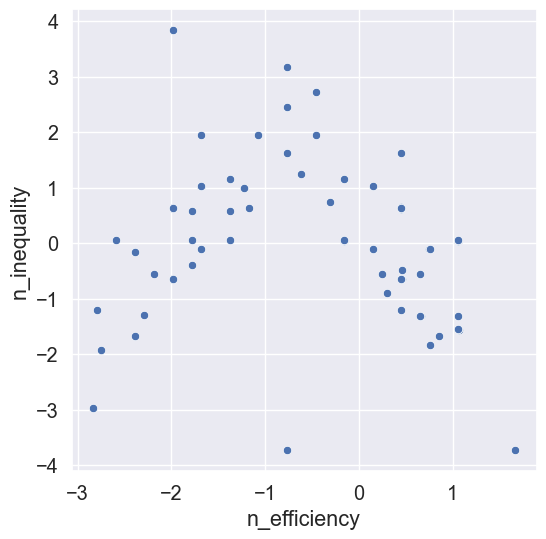

In [7]:
fig1, ax = plt.subplots(figsize=(6,6))
sns.scatterplot(data=df_std, ax=ax, x='n_efficiency', y='n_inequality')

## PCA

### Find eigenvalues and eigenvectors of the data matrix

In [8]:
X_dat = df_std.to_numpy()
X_dat.shape

(201, 3)

In [9]:
#Principal component analisys
def pca(X):
    cov = np.matmul(X.T,X) / X.shape[0]
    e_val, e_vec = np.linalg.eig(cov)
    return e_val, e_vec

In [10]:
vals, vecs = pca(X_dat)
vals, vecs

(array([1.90354565, 0.27961091, 0.81684343]),
 array([[-0.57935221,  0.58139263,  0.57125618],
        [ 0.47221161, -0.33184443,  0.81663668],
        [-0.66435473, -0.74287407,  0.08228555]]))

### Dimension reduction

In [11]:
#Project the data onto a smaller number (k) of dimensions
def projectData(X, B, k):
    Z = np.matmul(X,B[:,:k])
    return Z

#Recover data from projections (looses perpendicular components to the subspace)
def recoverData(Z, B, k):
    Xrec = np.matmul(Z,B[:,:k].T)
    return Xrec

In [21]:
#Project on fewer dimensions
Z_dat = projectData(X_dat, vecs, 2)
Z_dat.shape

(201, 2)

In [15]:
df_prj = pd.DataFrame(Z_dat, columns=['x1','x2'])
df_prj = df_prj.join(df)
df_prj.head()

,x1,x2,efficiency,inequality,n_efficiency,n_inequality,entropy,frequency
0,0.817799,0.672455,121.656250,211.147819,0.062404,0.108309,0.000000,0.00
1,-0.537992,-0.600970,80.479375,80.855471,0.124356,0.124937,0.396205,0.32
2,1.546676,-0.122727,-0.625000,0.572822,-0.104167,0.095470,0.000000,0.00
3,2.008480,-0.553431,-0.500000,0.306186,-0.166667,0.102062,0.000000,0.00
4,0.814877,0.674836,121.468750,209.957555,0.062597,0.108198,0.000000,0.00


In [17]:
#Recover data after projection
X_rec = recoverData(Z_dat, vecs, 2)
df_rec = pd.DataFrame(X_rec, columns=['n_efficiency','n_inequality','entropy'])
df_rec.head()

,n_efficiency,n_inequality,entropy
0,-0.082834,0.163024,-1.042858
1,-0.037712,-0.054618,0.803863
2,-0.967423,0.771085,-0.936371
3,-1.485378,1.132080,-0.923213
4,-0.079756,0.160854,-1.042686


### Relative loss

In [18]:
#Compute relative loss using the eigenvalues
def relativeLoss(ev, k):
    Vtot = ev.sum()
    Vk = ev[:k].sum()
    return 1-Vk/Vtot

In [20]:
Jr = relativeLoss(vals, 2)
print("The relative loss of variance due to PCA was {0:0.2f}%".format(Jr*100))

The relative loss of variance due to PCA was 27.23%


### Plot projected data

In [22]:
#fig2 = plt.figure(figsize=(6,6))
#ax2 = fig2.add_subplot(111, projection='3d')
#ax2.scatter(df_prj['x1'],df_prj['x2'],df_prj['x3'])

In [23]:
#df_prj.to_csv("data/pca_projection.csv")

<Axes: xlabel='x1', ylabel='x2'>

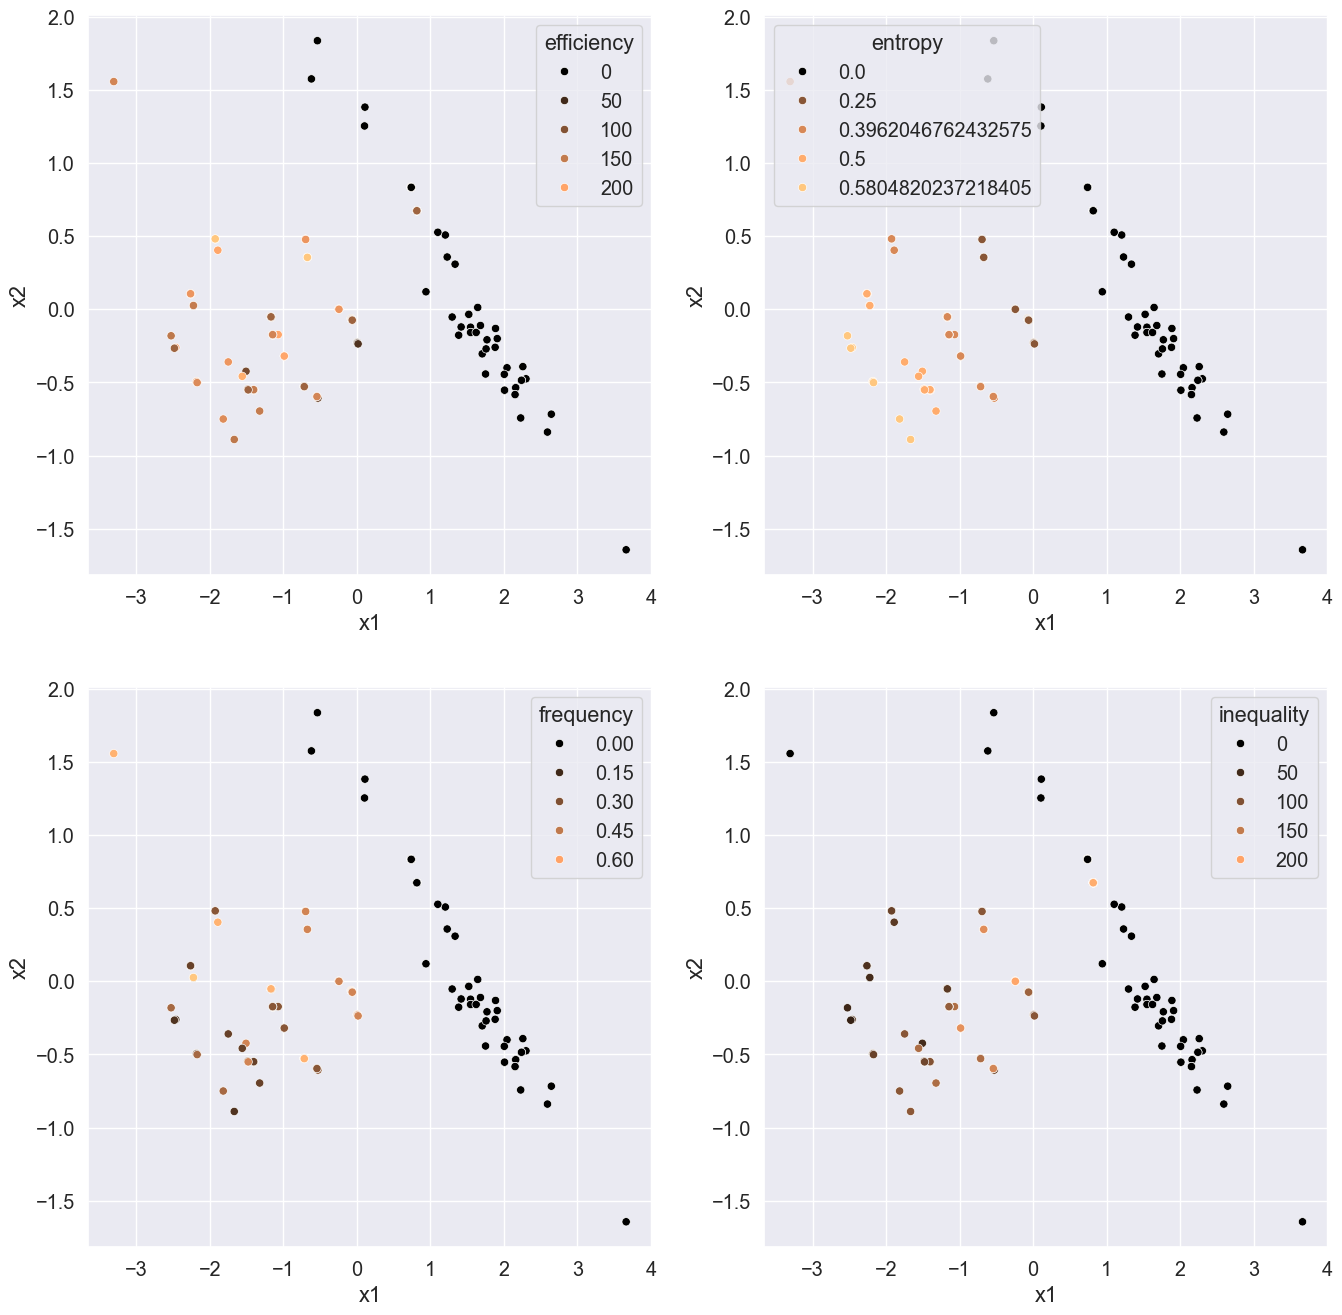

In [26]:
fig2, axis = plt.subplots(nrows=2, ncols=2, figsize=(16,16))
sns.scatterplot(data=df_prj, ax=axis[0][0], x='x1', y='x2', hue='efficiency', palette='copper')
sns.scatterplot(data=df_prj, ax=axis[0][1], x='x1', y='x2', hue='entropy', palette='copper')
sns.scatterplot(data=df_prj, ax=axis[1][0], x='x1', y='x2', hue='frequency', palette='copper')
sns.scatterplot(data=df_prj, ax=axis[1][1], x='x1', y='x2', hue='inequality', palette='copper')